In [1]:
import os, glob, re, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers, activations, optimizers, losses, metrics, initializers
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
import sklearn
from keras import utils
from sklearn.preprocessing import LabelEncoder

In [2]:
# dir_path points towards where to find the image dataset
dir_path = "data/archive/Dataset_BUSI_with_GT/"
IMAGE_SHAPE = (224, 224)

# This is a good sample as it gives a good mix of val data
random_sample = 1


In [3]:
# Read the folders folders
directories = os.listdir(dir_path)

files = [] 
labels = []

# Read files for each directory
for folder in directories:
    
    fileList = glob.glob(f'{dir_path}/{folder}/*')
    labels.extend([folder for _ in fileList])
    files.extend(fileList)

len(files), len(labels)

(1578, 1578)

In [4]:
# Count the number of labels to get an idea of how balanced the dataset is
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

{'benign': 891, 'malignant': 421, 'normal': 266}


In [5]:
# One hot encoding

# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
encoded_Y = encoder.transform(labels)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = utils.to_categorical(encoded_Y,dtype ="uint8", num_classes = 3)

labels = np.array(dummy_y)

print(f"Classes are {encoder.classes_}")

Classes are ['benign' 'malignant' 'normal']


In [6]:
# Create two lists to hold only non-mask images and label for each one
selected_files = []
selected_labels = []

for file, label in zip(files, labels):
    if 'mask' not in file:
        selected_files.append(file)
        selected_labels.append(label)

len(selected_files), len(selected_labels)

(780, 780)

In [30]:
class_A = []
class_B = []
class_C = []

for f, l in zip(selected_files,selected_labels):
    if l[0] == 1:
        class_A.append(f)
    if l[1] == 1:
        class_B.append(f)
    if l[2] == 1:
        class_C.append(f)

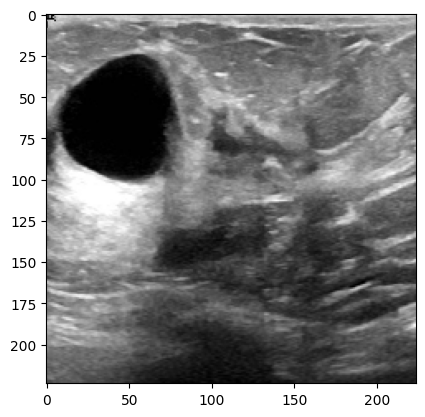

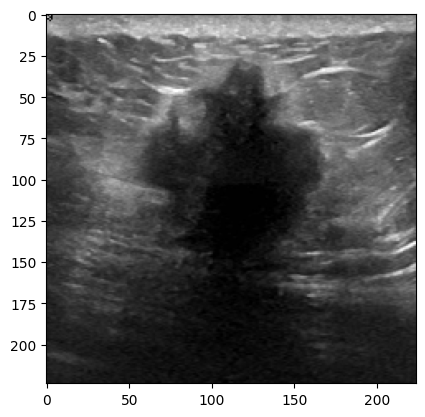

In [46]:
id_A = 1
id_B = 93
# id_C = 2

new_file_A = image.load_img(class_A[id_A], target_size=IMAGE_SHAPE)
plt.imshow(new_file_A)
plt.show()
new_file_B = image.load_img(class_B[id_B], target_size=IMAGE_SHAPE)
plt.imshow(new_file_B)
plt.show()
# new_file_C = image.load_img(class_C[id_C], target_size=IMAGE_SHAPE)
# plt.imshow(new_file_C)
# plt.show()

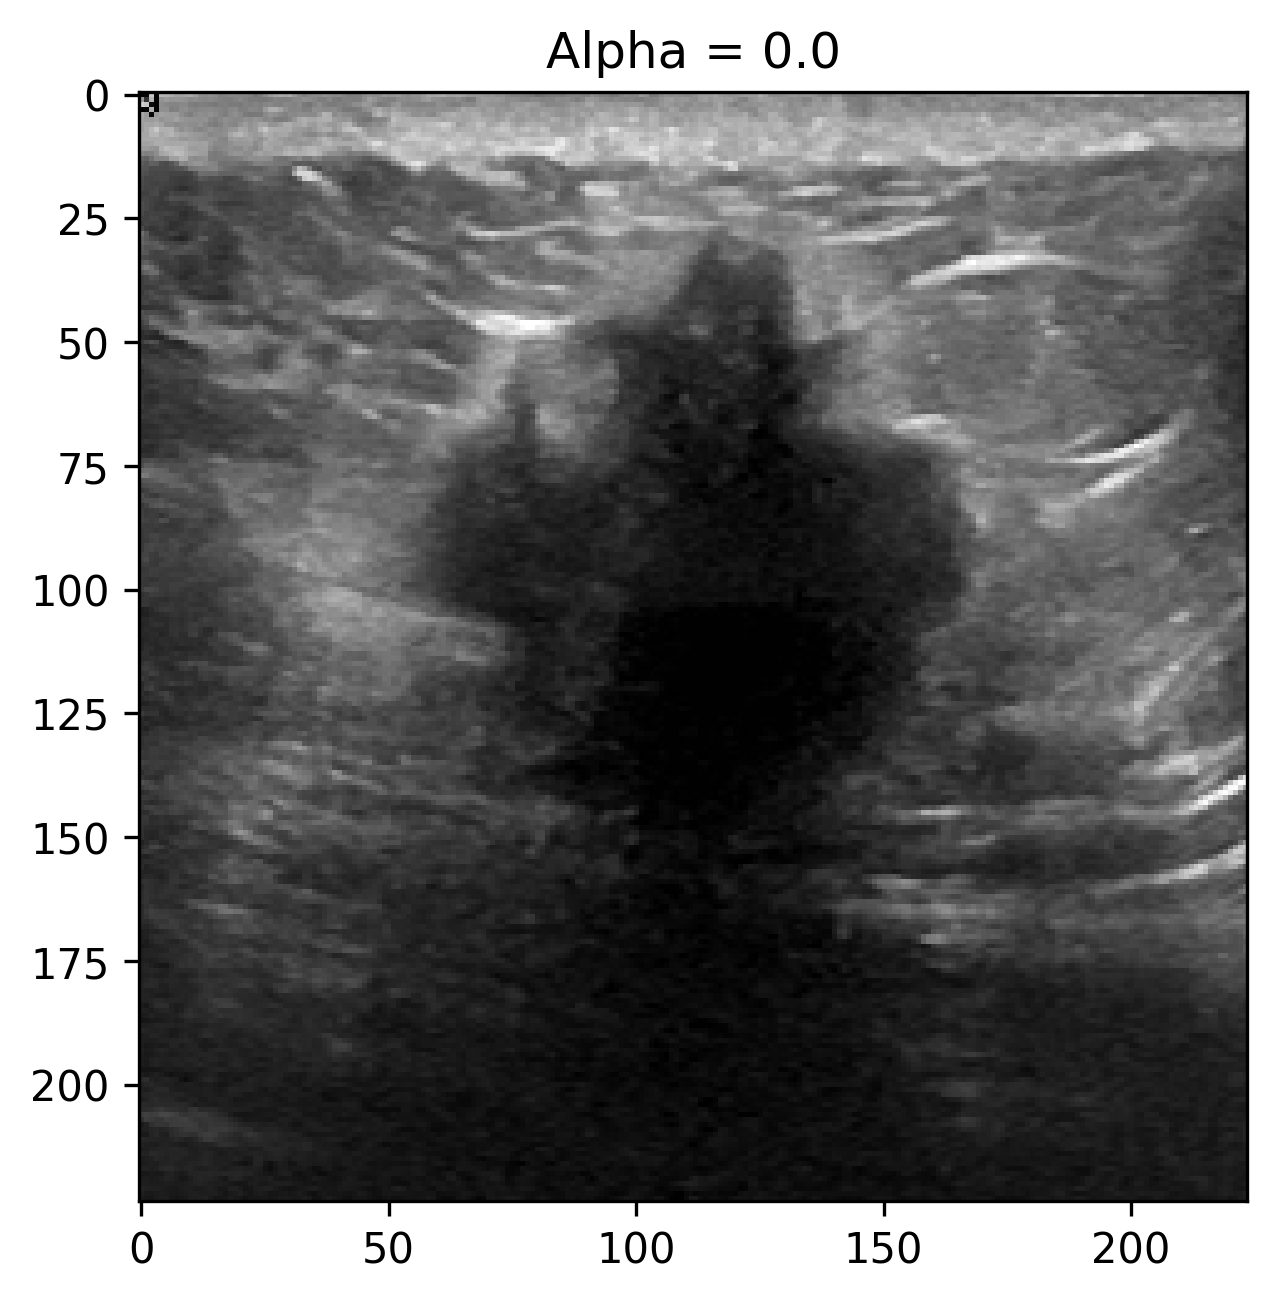

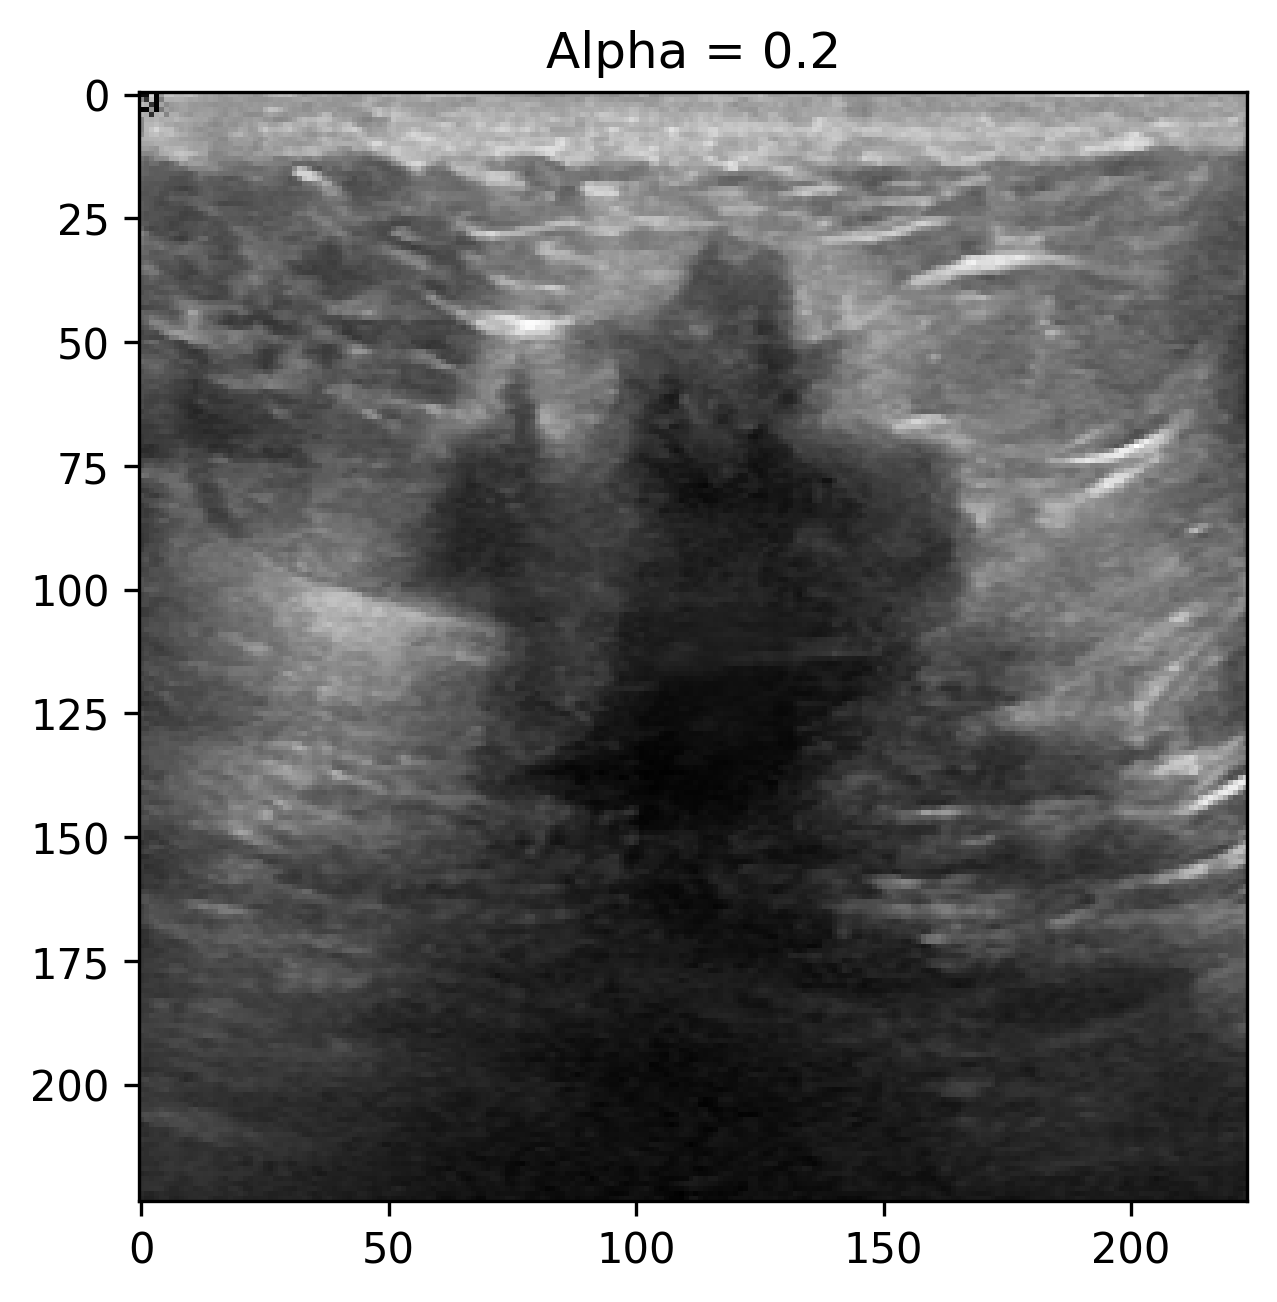

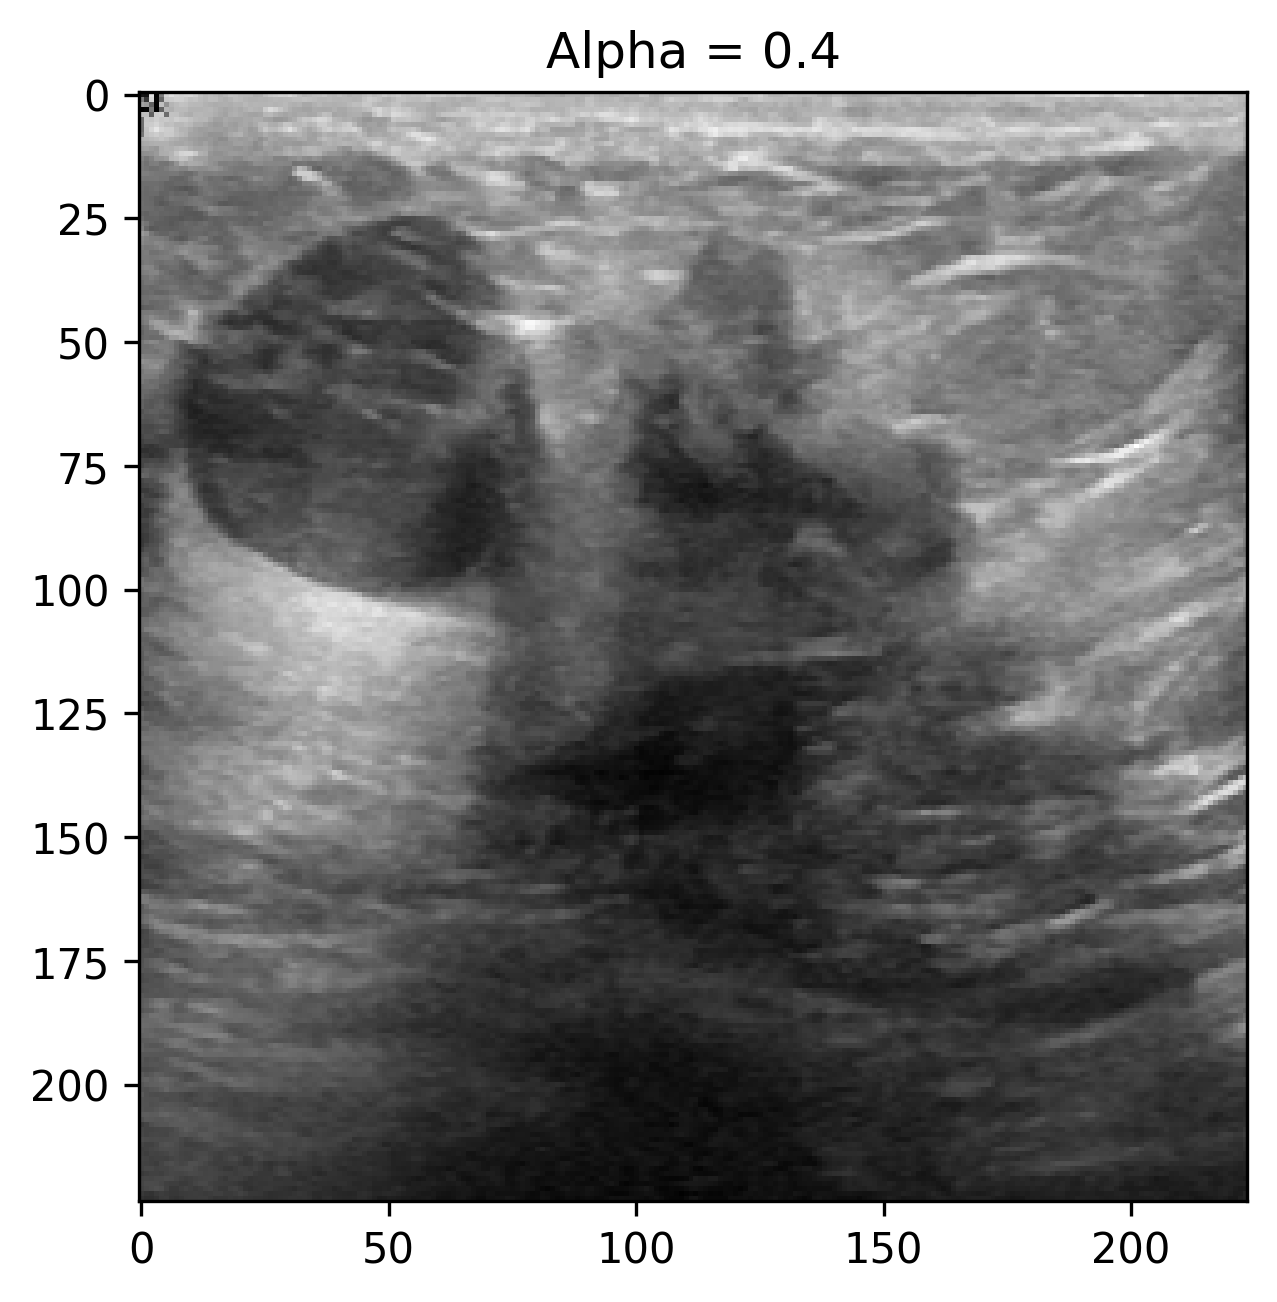

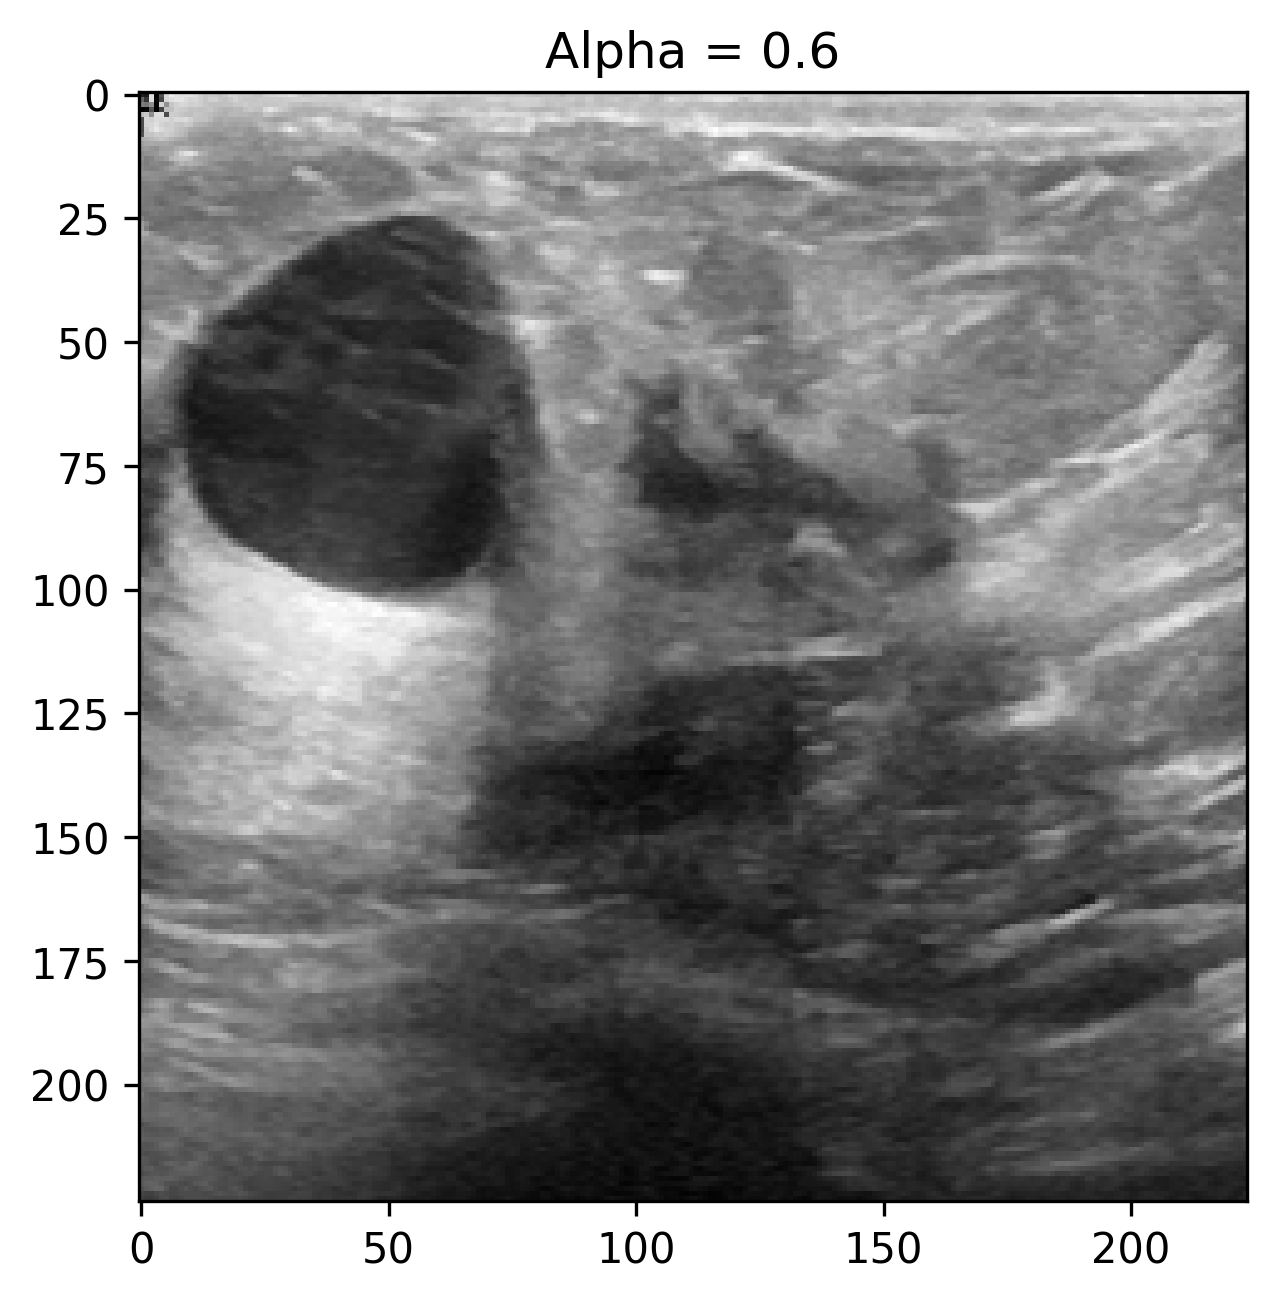

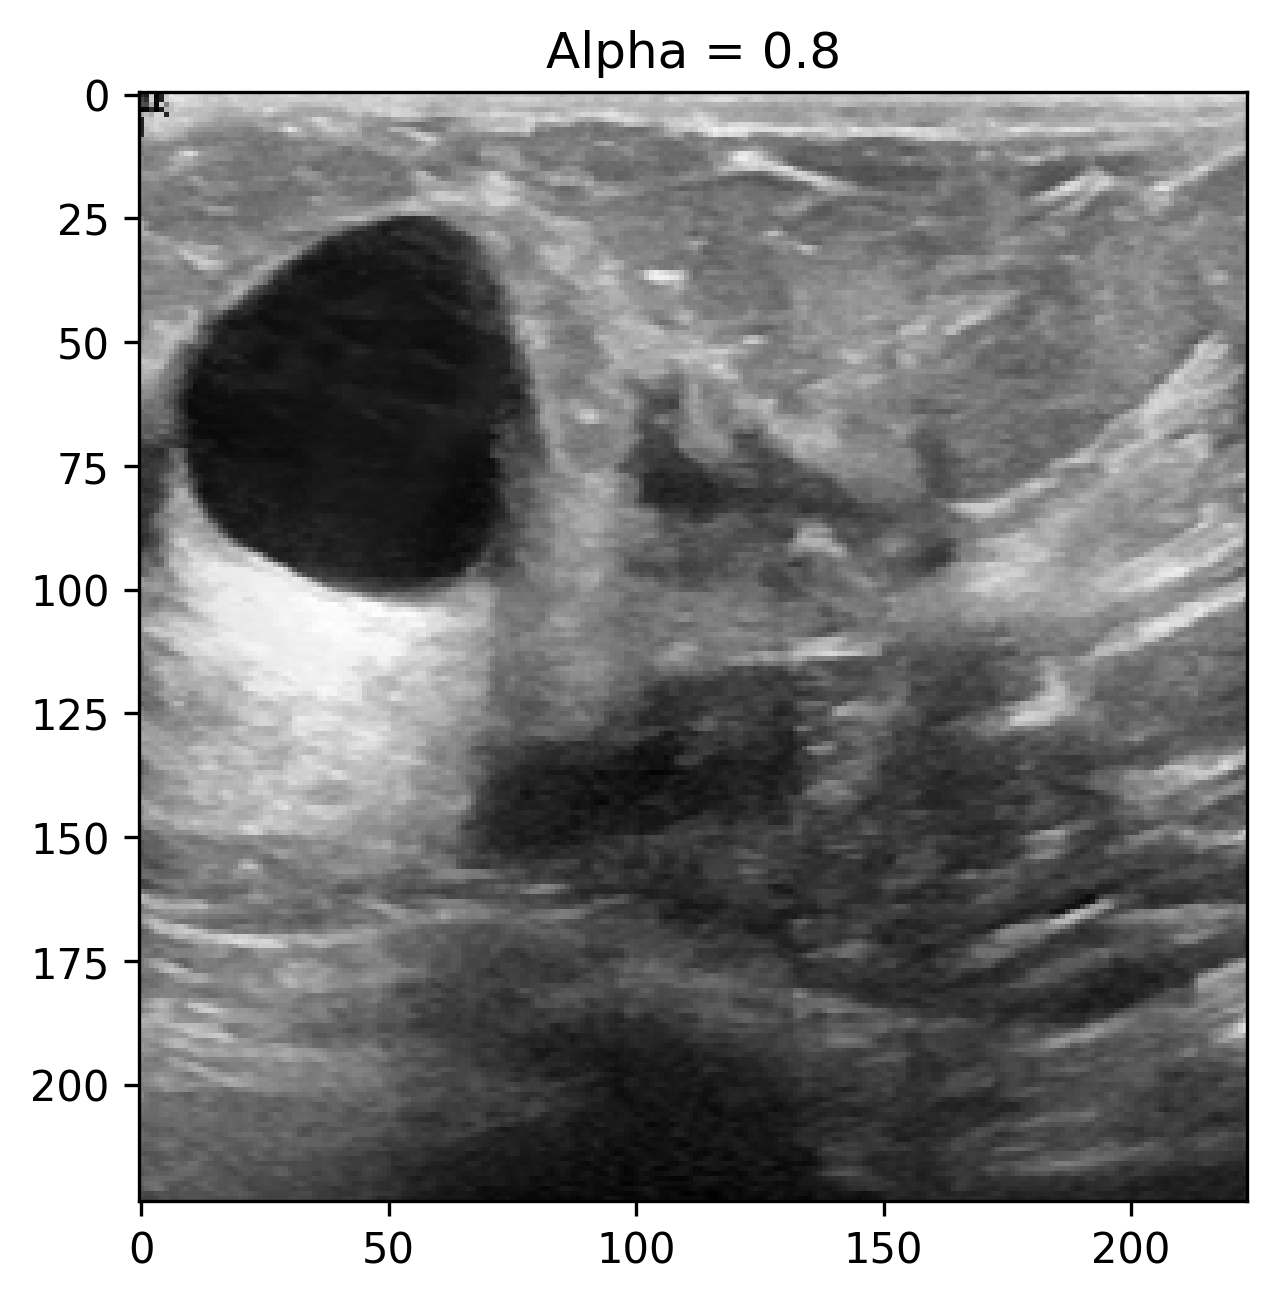

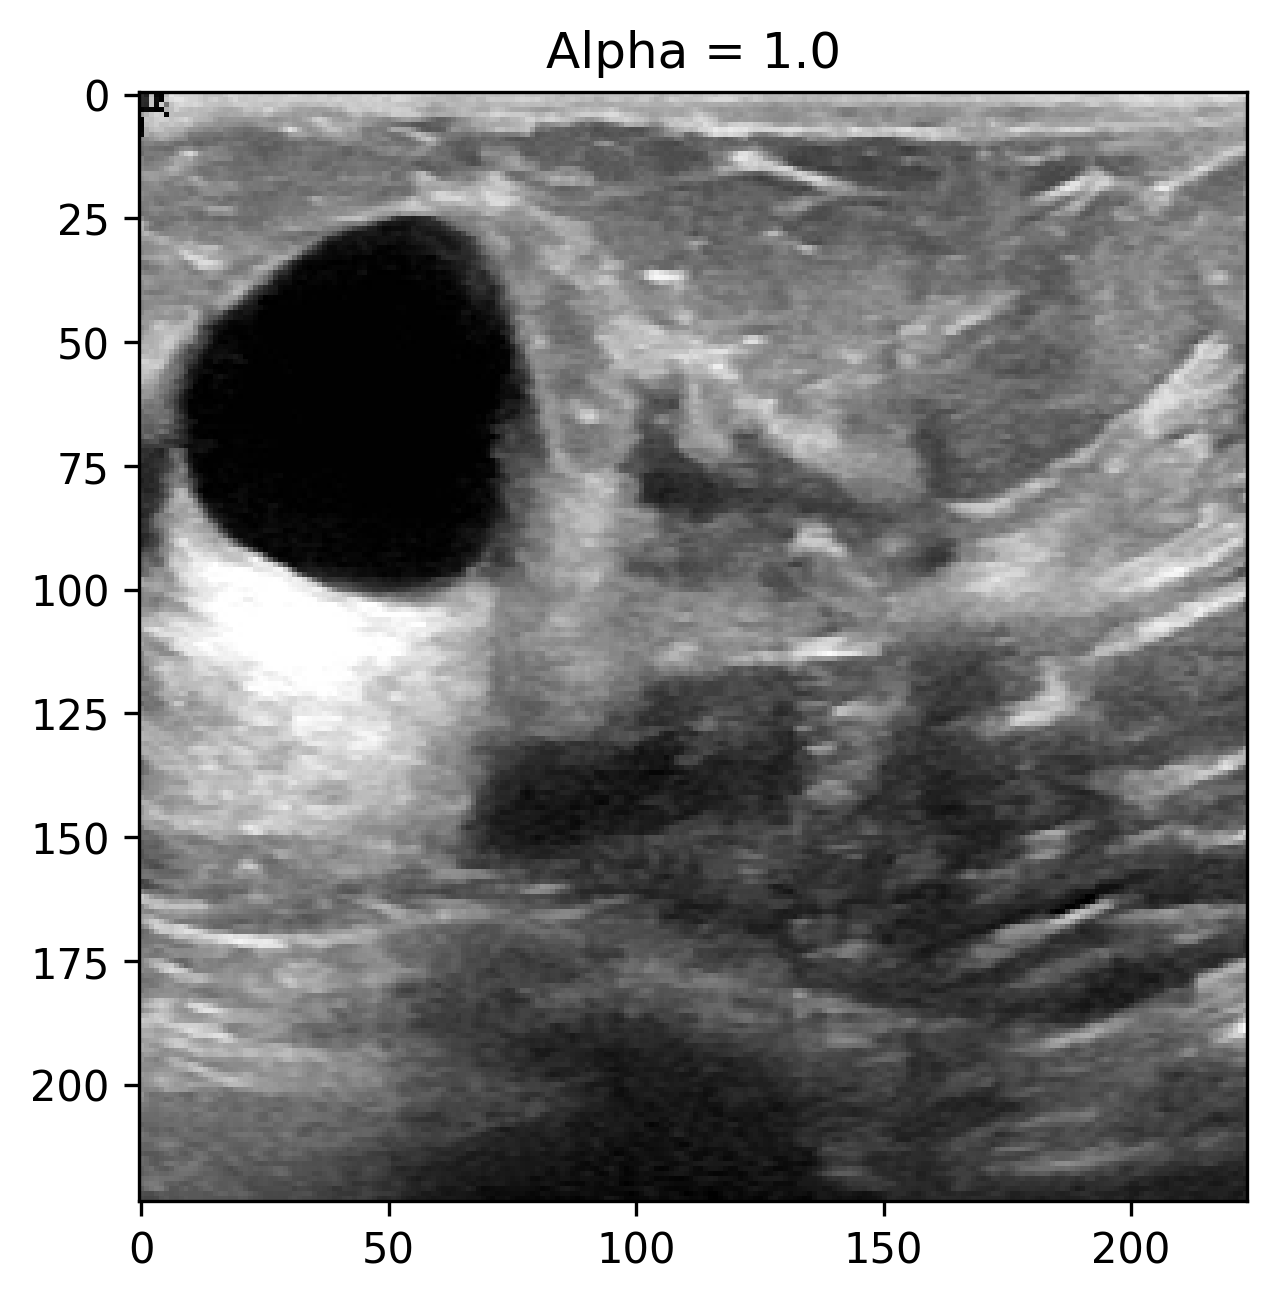

In [51]:
id_A = 1
id_B = 93

new_file_A = image.load_img(class_A[id_A], target_size=IMAGE_SHAPE)
new_file_B = image.load_img(class_B[id_B], target_size=IMAGE_SHAPE)

for i in range(6):

    alpha = round(0.2*i, 2)

    array_A = image.img_to_array(new_file_A)
    array_B = image.img_to_array(new_file_B)
    
    mixup = alpha * array_A + (1-alpha) * array_B

    fig, ax = plt.subplots(1,1)

    ax.imshow(image.array_to_img(mixup))

    ax.set_title(f"Alpha = {alpha}")
    fig.set_dpi(300)
    plt.savefig(f"Breast_Cancer_Scan_Alpha_{alpha}.png")
    plt.show()